# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from pathlib import Path

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# IMPORT DATA

## Combustion Cars

In [3]:
#CHANGE folder  
os.chdir("/content/drive/MyDrive/PFM/01 Mobility/Food Delivery Study/Data Analysis/Cambridge/TraditionalScenario/Combustion_Cars")

if True: #Load all csv files in directory and concat just once 
    extension = 'csv'

    # Combustion car trips
    combustion_car_trips_filenames = [i for i in glob.glob('car_trip_event*.{}'.format(extension))]
    combustion_car_trips_df_temp= pd.concat([pd.read_csv(f) for f in combustion_car_trips_filenames ])
    
    # Combustion car refilling
    combustion_car_refilling_filenames = [i for i in glob.glob('Car_fuel_refilling*.{}'.format(extension))]
    combustion_car_refilling_df_temp= pd.concat([pd.read_csv(f) for f in combustion_car_refilling_filenames ])
    
    # Combustion car roads traveled
    combustion_car_roads_filenames = [i for i in glob.glob('car_roadstraveled*.{}'.format(extension))]
    combustion_car_roads_df_temp= pd.concat([pd.read_csv(f) for f in combustion_car_roads_filenames ])
    
    # Combustion car package events
    combustion_car_package_events_filenames =[i for i in glob.glob('package_event*.{}'.format(extension))]
    combustion_car_package_events_df_temp= pd.concat([pd.read_csv(f) for f in combustion_car_package_events_filenames ])
    
    # Combustion car package trips
    combustion_car_package_trips_filenames =[i for i in glob.glob('package_trips_*.{}'.format(extension))]
    combustion_car_package_trips_df_temp= pd.concat([pd.read_csv(f) for f in combustion_car_package_trips_filenames ])
  
filepath_demand = "/content/drive/MyDrive/PFM/01 Mobility/Food Delivery Study/Data Analysis/Cambridge/"
demand_df = pd.read_csv(filepath_demand + 'fooddeliverytrips_cambridge.csv')

In [4]:
# Prepare DataFrames
combustion_car_trips_df = combustion_car_trips_df_temp.copy()
combustion_car_refilling_df = combustion_car_refilling_df_temp.copy()
combustion_car_roads_df = combustion_car_roads_df_temp.copy()
combustion_car_package_events_df = combustion_car_package_events_df_temp.copy()
combustion_car_package_trips_df = combustion_car_package_trips_df_temp.copy()

## Electric Cars


In [5]:
#CHANGE folder  
os.chdir("/content/drive/MyDrive/PFM/01 Mobility/Food Delivery Study/Data Analysis/Cambridge/TraditionalScenario/Electric_Cars")

if True: #Load all csv files in directory and concat just once 
    extension = 'csv'

    # Electric car trips
    electric_car_trips_filenames = [i for i in glob.glob('car_trip_event*.{}'.format(extension))]
    electric_car_trips_df_temp= pd.concat([pd.read_csv(f) for f in electric_car_trips_filenames ])
    
    # Electric car refilling
    electric_car_refilling_filenames = [i for i in glob.glob('Car_fuel_refilling*.{}'.format(extension))]
    electric_car_refilling_df_temp= pd.concat([pd.read_csv(f) for f in electric_car_refilling_filenames ])
    
    # Electric car roads traveled
    electric_car_roads_filenames = [i for i in glob.glob('car_roadstraveled*.{}'.format(extension))]
    electric_car_roads_df_temp= pd.concat([pd.read_csv(f) for f in electric_car_roads_filenames ])
    
    # Electric car package events
    electric_car_package_events_filenames =[i for i in glob.glob('package_event*.{}'.format(extension))]
    electric_car_package_events_df_temp= pd.concat([pd.read_csv(f) for f in electric_car_package_events_filenames ])
    
    # Electric car package trips
    electric_car_package_trips_filenames =[i for i in glob.glob('package_trips_*.{}'.format(extension))]
    electric_car_package_trips_df_temp= pd.concat([pd.read_csv(f) for f in electric_car_package_trips_filenames ])

In [6]:
# Prepare DataFrames
electric_car_trips_df = electric_car_trips_df_temp.copy()
electric_car_refilling_df = electric_car_refilling_df_temp.copy()
electric_car_roads_df = electric_car_roads_df_temp.copy()
electric_car_package_events_df = electric_car_package_events_df_temp.copy()
electric_car_package_trips_df = electric_car_package_trips_df_temp.copy()

# READ DATA

In [7]:
print("---Combustion car trips---")
combustion_car_trips_df.head(3)

---Combustion car trips---


,Cycle,Time,Traditional Scenario,Num Autonomous Bikes,Autonomous Bikes Battery Life,AB PickUp Speed,Num Cars,Agent,Event,Message,Start Time,End Time,Duration (min),Distance Traveled,Start Fuel %,End Fuel %,Fuel Gain %
0,0,00:00:00,True,200,50000.0,2.222222,75,car0,START: wandering,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,00:00:00,True,200,50000.0,2.222222,75,car1,START: wandering,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,00:00:00,True,200,50000.0,2.222222,75,car2,START: wandering,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print("---Electric car trips---")
electric_car_trips_df.head(3)

---Electric car trips---


,Cycle,Time,Traditional Scenario,Num Autonomous Bikes,Autonomous Bikes Battery Life,AB PickUp Speed,Num Cars,Agent,Event,Message,Start Time,End Time,Duration (min),Distance Traveled,Start Fuel %,End Fuel %,Fuel Gain %
0,0,00:00:00,True,200,50000.0,2.222222,60,car0,START: wandering,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,00:00:00,True,200,50000.0,2.222222,60,car1,START: wandering,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,00:00:00,True,200,50000.0,2.222222,60,car2,START: wandering,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print("---Combustion car refilling trips---")
combustion_car_refilling_df.head(3)

---Combustion car refilling trips---


,Cycle,Time,Traditional Scenario,Num Autonomous Bikes,Autonomous Bikes Battery Life,AB PickUp Speed,Num Cars,Agent,Gas Station,Start Time,End Time,Duration (min),Start Fuel %,End Fuel %,Fuel Gain %
0,13688,07:36:16,True,200,50000.0,2.222222,65,car57,gasstation[6],07:33:42,07:36:16,2.566667,14.581320,100.0,85.418680
1,23592,13:06:24,True,200,50000.0,2.222222,65,car6,gasstation[4],13:03:50,13:06:24,2.566667,14.658259,100.0,85.341741
2,24351,13:31:42,True,200,50000.0,2.222222,65,car18,gasstation[5],13:29:06,13:31:42,2.600000,13.541107,100.0,86.458893


In [10]:
print("---Electric car refilling trips---")
electric_car_refilling_df.head(3)

---Electric car refilling trips---


,Cycle,Time,Traditional Scenario,Num Autonomous Bikes,Autonomous Bikes Battery Life,AB PickUp Speed,Num Cars,Agent,Gas Station,Start Time,End Time,Duration (min),Start Fuel %,End Fuel %,Fuel Gain %
0,15781,08:46:02,True,200,50000.0,2.222222,70,car18,gasstation[6],08:20:22,08:46:02,25.666667,14.460431,100.0,85.539569
1,16332,09:04:24,True,200,50000.0,2.222222,70,car30,gasstation[6],08:38:44,09:04:24,25.666667,14.465271,100.0,85.534729
2,18631,10:21:02,True,200,50000.0,2.222222,70,car68,gasstation[5],09:55:00,10:21:02,26.033333,13.318583,100.0,86.681417


In [11]:
print("---Combustion car roads traveled---")
combustion_car_roads_df.head(3)

---Combustion car roads traveled---


,Cycle,Time,Traditional Scenario,Num Autonomous Bikes,Autonomous Bikes Battery Life,AB PickUp Speed,Num Cars,Agent,Distance Traveled
0,0,00:00:00,True,200,50000.0,2.222222,50,car0,0.0
1,0,00:00:00,True,200,50000.0,2.222222,50,car1,0.0
2,0,00:00:00,True,200,50000.0,2.222222,50,car2,0.0


In [12]:
print("---Electric car roads traveled---")
electric_car_roads_df.head(3)

---Electric car roads traveled---


,Cycle,Time,Traditional Scenario,Num Autonomous Bikes,Autonomous Bikes Battery Life,AB PickUp Speed,Num Cars,Agent,Distance Traveled
0,0,00:00:00,True,200,50000.0,2.222222,60,car0,0.0
1,0,00:00:00,True,200,50000.0,2.222222,60,car1,0.0
2,0,00:00:00,True,200,50000.0,2.222222,60,car2,0.0


In [13]:
print("---Combustion car package events---")
combustion_car_package_events_df.head(3)

---Combustion car package events---


,Cycle,Time,Traditional Scenario,Num Autonomous Bikes,Autonomous Bikes Battery Life,AB PickUp Speed,Num Cars,Agent,Event,Mode,Message,Start Time,End Time,Duration (min),Distance (m)
0,0,00:00:00,True,200,50000.0,2.222222,40,package0,START: generated,nil,NaN,NaN,NaN,NaN,NaN
1,0,00:00:00,True,200,50000.0,2.222222,40,package1,START: generated,nil,NaN,NaN,NaN,NaN,NaN
2,0,00:00:00,True,200,50000.0,2.222222,40,package2,START: generated,nil,NaN,NaN,NaN,NaN,NaN


In [14]:
print("---Electric car package events---")
electric_car_package_events_df.head(3)

---Electric car package events---


,Cycle,Time,Traditional Scenario,Num Autonomous Bikes,Autonomous Bikes Battery Life,AB PickUp Speed,Num Cars,Agent,Event,Mode,Message,Start Time,End Time,Duration (min),Distance (m)
0,0,00:00:00,True,200,50000.0,2.222222,5,package0,START: generated,nil,NaN,NaN,NaN,NaN,NaN
1,0,00:00:00,True,200,50000.0,2.222222,5,package1,START: generated,nil,NaN,NaN,NaN,NaN,NaN
2,0,00:00:00,True,200,50000.0,2.222222,5,package2,START: generated,nil,NaN,NaN,NaN,NaN,NaN


In [15]:
print("---Combustion car package trips---")
combustion_car_package_trips_df.head(3)

---Combustion car package trips---


,Cycle,Time,Traditional Scenario,Num Autonomous Bikes,Autonomous Bikes Battery Life,AB PickUp Speed,Num Cars,Agent,Trip Served,Mode,Wait Time (min),Departure Time,Arrival Time,Duration (min),Origin [lat],Origin [lon],Destination [lat],Destination [lon],Distance (m)
0,899,00:29:58,True,200,50000.0,2.222222,55,package0,True,2,0.8,00:21:50,00:29:58,8.133333,-71.086885,42.372127,-71.123928,42.388293,3572.407064
1,1808,01:00:16,True,200,50000.0,2.222222,55,package1,True,2,0.6,00:59:38,01:00:16,0.633333,-71.118519,42.370282,-71.119940,42.372069,245.029469
2,1862,01:02:04,True,200,50000.0,2.222222,55,package2,True,2,1.0,01:00:02,01:02:04,2.033333,-71.119396,42.373092,-71.113837,42.377690,744.582664


In [16]:
print("---Electric car package trips---")
electric_car_package_trips_df.head(3)

---Electric car package trips---


,Cycle,Time,Traditional Scenario,Num Autonomous Bikes,Autonomous Bikes Battery Life,AB PickUp Speed,Num Cars,Agent,Trip Served,Mode,Wait Time (min),Departure Time,Arrival Time,Duration (min),Origin [lat],Origin [lon],Destination [lat],Destination [lon],Distance (m)
0,899,00:29:58,True,200,50000.0,2.222222,65,package0,True,2,0.800000,00:21:50,00:29:58,8.133333,-71.086885,42.372127,-71.123928,42.388293,3572.407064
1,1810,01:00:20,True,200,50000.0,2.222222,65,package1,True,2,0.666667,00:59:42,01:00:20,0.633333,-71.118519,42.370282,-71.119940,42.372069,245.029469
2,1846,01:01:32,True,200,50000.0,2.222222,65,package2,True,2,0.466667,00:59:30,01:01:32,2.033333,-71.119396,42.373092,-71.113837,42.377690,744.582664


# ANALYZE RESULTS

## Package events || Trips Served


### Preliminary Code

In [17]:
# Analyzed fleet sizes of the batch experiment
n_cars_possible=combustion_car_package_trips_df['Num Cars'].unique()
l_n_cars=len(n_cars_possible)

In [18]:
# Generation of the serve trips table
cc_served_trips_df = pd.DataFrame(n_cars_possible)
cc_served_trips_df = cc_served_trips_df.rename(columns={0: "Num Cars"}, errors="raise")
cc_served_trips_df['% trips served'] = ' '

ec_served_trips_df = pd.DataFrame(n_cars_possible)
ec_served_trips_df = ec_served_trips_df.rename(columns={0: "Num Cars"}, errors="raise")
ec_served_trips_df['% trips served'] = ' '

In [19]:
# Generation of the auxiliar array for results
n_cars_possible_df = pd.DataFrame(n_cars_possible)
aux_array = pd.array(['Event Description / Num Cars'])
aux_array_df = pd.DataFrame(aux_array)
aux_array_df = pd.concat([aux_array_df,n_cars_possible_df])
aux_array_df = aux_array_df.rename(columns={0: "Index"}, errors="raise")

In [20]:
# Generation of the events table for every fleet size
cc_package_events_analysis_df = pd.DataFrame(columns=aux_array_df['Index'])
cc_package_events_analysis_df['Event Description / Num Cars'] = combustion_car_package_events_df['Event'].unique()
cc_package_events_analysis_df.at[13,'Event Description / Num Cars'] = 'Percentage of trips served: '

ec_package_events_analysis_df = pd.DataFrame(columns=aux_array_df['Index'])
ec_package_events_analysis_df['Event Description / Num Cars'] = electric_car_package_events_df['Event'].unique()
ec_package_events_analysis_df.at[13,'Event Description / Num Cars'] = 'Percentage of trips served: '

### Trips Served

In [21]:
# Fulfill the generated event table: number of trips with specifications
for i in range(l_n_cars):
    cc_p_trips = combustion_car_package_events_df[combustion_car_package_events_df['Num Cars']==n_cars_possible[i]]
    l_cc_p_trips=len(cc_p_trips)

    ec_p_trips = electric_car_package_events_df[electric_car_package_events_df['Num Cars']==n_cars_possible[i]]
    l_ec_p_trips=len(ec_p_trips)

    cc_li = list(cc_p_trips['Agent'].value_counts())
    ec_li = list(ec_p_trips['Agent'].value_counts())

    cc_events_count = cc_p_trips['Event'].value_counts()
    cc_events_count = pd.DataFrame(cc_events_count).reset_index()
    cc_events_count = cc_events_count.rename(columns={"index": "Event Description / Num Cars"}, errors="raise")
   
    ec_events_count = ec_p_trips['Event'].value_counts()
    ec_events_count = pd.DataFrame(ec_events_count).reset_index()
    ec_events_count = ec_events_count.rename(columns={"index": "Event Description / Num Cars"}, errors="raise")

    cc_trips_served = cc_events_count.at[12,'Event']
    cc_total_trips = len(cc_li)
    cc_p_trips_served = cc_trips_served/cc_total_trips*100

    ec_trips_served = ec_events_count.at[12,'Event']
    ec_total_trips = len(ec_li)
    ec_p_trips_served = ec_trips_served/ec_total_trips*100

    cc_events_count.at[13,'Event Description / Num Cars'] = 'Percentage of trips served: '
    cc_events_count.at[13,'Event'] = cc_p_trips_served

    ec_events_count.at[13,'Event Description / Num Cars'] = 'Percentage of trips served: '
    ec_events_count.at[13,'Event'] = ec_p_trips_served

    cc_served_trips_df.at[i,'% trips served'] = cc_p_trips_served

    ec_served_trips_df.at[i,'% trips served'] = ec_p_trips_served

    cc_package_events_analysis_df[n_cars_possible[i]] = cc_events_count['Event']
    cc_package_events_analysis_df = cc_package_events_analysis_df.round(2)

    ec_package_events_analysis_df[n_cars_possible[i]] = ec_events_count['Event']
    ec_package_events_analysis_df = ec_package_events_analysis_df.round(2)

# Traspose table for future printing
cc_p_events_transp = cc_package_events_analysis_df.transpose()
cc_p_events_transp = cc_p_events_transp.reset_index()

ec_p_events_transp = ec_package_events_analysis_df.transpose()
ec_p_events_transp = ec_p_events_transp.reset_index()

cc_headers = cc_p_events_transp.iloc[0]
cc_new_p_events_transp  = pd.DataFrame(cc_p_events_transp.values[1:], columns=cc_headers)
cc_new_p_events_transp = cc_new_p_events_transp.sort_values(by=['Event Description / Num Cars']).reset_index().drop('index',axis=1)

ec_headers = ec_p_events_transp.iloc[0]
ec_new_p_events_transp  = pd.DataFrame(ec_p_events_transp.values[1:], columns=ec_headers)
ec_new_p_events_transp = ec_new_p_events_transp.sort_values(by=['Event Description / Num Cars']).reset_index().drop('index',axis=1)

Combustion car minimum fleet to serve 100% of the trips:  35  cars
Electric car minimum fleet to serve 100% of the trips:  35  cars


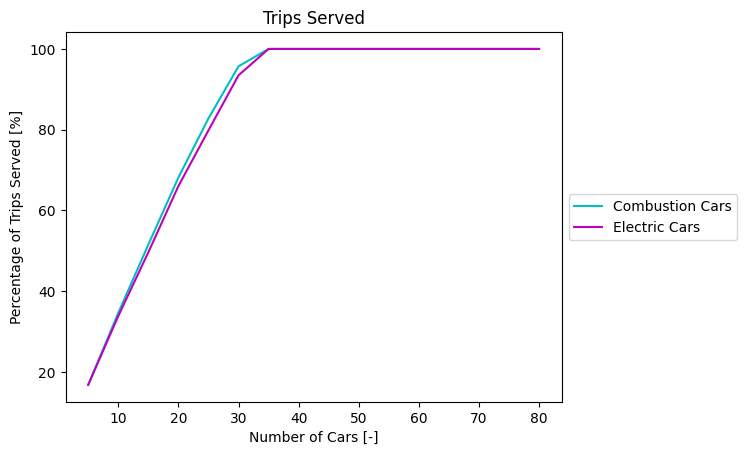

In [22]:
for i in range(len(cc_new_p_events_transp)):
  cc_analysis = cc_new_p_events_transp.at[i,'Percentage of trips served: ']
  if cc_analysis >= 100:
    cc_fleet_serve = cc_new_p_events_transp.at[i,'Event Description / Num Cars']
    break

for i in range(len(ec_new_p_events_transp)):
  ec_analysis = ec_new_p_events_transp.at[i,'Percentage of trips served: ']
  if ec_analysis >= 100:
    ec_fleet_serve = ec_new_p_events_transp.at[i,'Event Description / Num Cars']
    break

print('Combustion car minimum fleet to serve 100% of the trips: ', cc_fleet_serve, ' cars')
print('Electric car minimum fleet to serve 100% of the trips: ', ec_fleet_serve, ' cars')

plt.title('Trips Served')
plt.xlabel('Number of Cars [-]') 
plt.ylabel('Percentage of Trips Served [%]') 
plt.plot(cc_new_p_events_transp['Event Description / Num Cars'],cc_new_p_events_transp['Percentage of trips served: '],color='c',label="Combustion Cars")
plt.plot(ec_new_p_events_transp['Event Description / Num Cars'],ec_new_p_events_transp['Percentage of trips served: '],color='m',label="Electric Cars")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 

In [23]:
# results_path=Path('/content/drive/MyDrive/PFM/01 Mobility/Food Delivery Study/Data Analysis/Cambridge/TraditionalScenario/2022-09-01 17.45.00/car_trips_served.csv')
# new_p_events_transp.to_csv(results_path,index=False)

## Package Event || Quality of the Service

### Preliminary Code


In [24]:
# Add column of full waiting time = pick up time + delivery time
combustion_car_package_trips_df['Total Time (min)'] = combustion_car_package_trips_df['Wait Time (min)'] + combustion_car_package_trips_df['Duration (min)']
electric_car_package_trips_df['Total Time (min)'] = electric_car_package_trips_df['Wait Time (min)'] + electric_car_package_trips_df['Duration (min)']

In [25]:
n_cars_possible = combustion_car_package_trips_df['Num Cars'].unique()
n_cars_possible.sort()
l_n_cars=len(n_cars_possible)

In [26]:
cc_late_trips_df = pd.DataFrame()
cc_late_trips_df['Num Cars'] = ' '

ec_late_trips_df = pd.DataFrame()
ec_late_trips_df['Num Cars'] = ' '

In [27]:
cc_quality_of_service_list = ['Num Cars','Total packages','Total trips','On time trips','% On time trips','Late trips','% Late trips','Max wait time','Min wait time','Average wait time','Average pick-up wait time','Average delivery wait time','Median wait time','Standard Deviation']
cc_quality_of_service_df = pd.DataFrame(columns=cc_quality_of_service_list)

ec_quality_of_service_list = ['Num Cars','Total packages','Total trips','On time trips','% On time trips','Late trips','% Late trips','Max wait time','Min wait time','Average wait time','Average pick-up wait time','Average delivery wait time','Median wait time','Standard Deviation']
ec_quality_of_service_df = pd.DataFrame(columns=ec_quality_of_service_list)

In [28]:
for i in range(l_n_cars):

    # Package trips
    cc_p_trips = combustion_car_package_trips_df[combustion_car_package_trips_df['Num Cars']==n_cars_possible[i]]
    l_cc_trips = len(cc_p_trips)

    ec_p_trips = electric_car_package_trips_df[electric_car_package_trips_df['Num Cars']==n_cars_possible[i]]
    l_ec_trips = len(ec_p_trips)

    # Quality of the service dataframe
    cc_quality_of_service_df.at[i,'Num Cars'] = n_cars_possible[i]
    cc_quality_of_service_df.at[i,'Total packages'] = len(combustion_car_package_events_df['Agent'].unique())
    cc_quality_of_service_df.at[i,'Total trips'] = l_cc_trips

    ec_quality_of_service_df.at[i,'Num Cars'] = n_cars_possible[i]
    ec_quality_of_service_df.at[i,'Total packages'] = len(electric_car_package_events_df['Agent'].unique())
    ec_quality_of_service_df.at[i,'Total trips'] = l_ec_trips

    # On time / Late trips
    cc_package_trips_ontime = cc_p_trips.loc[(cc_p_trips['Total Time (min)']<= 40)]
    cc_package_trips_late = cc_p_trips.loc[(cc_p_trips['Total Time (min)']> 40)]
    ec_package_trips_ontime = ec_p_trips.loc[(ec_p_trips['Total Time (min)']<= 40)]
    ec_package_trips_late = ec_p_trips.loc[(ec_p_trips['Total Time (min)']> 40)]

    cc_quality_of_service_df.at[i,'On time trips'] = cc_package_trips_ontime.shape[0]
    cc_quality_of_service_df.at[i,'Late trips'] = cc_package_trips_late.shape[0]
    ec_quality_of_service_df.at[i,'On time trips'] = ec_package_trips_ontime.shape[0]
    ec_quality_of_service_df.at[i,'Late trips'] = ec_package_trips_late.shape[0]

    cc_ontime_pct = cc_package_trips_ontime.shape[0]/l_cc_trips*100
    cc_late_pct = cc_package_trips_late.shape[0]/l_cc_trips*100
    ec_ontime_pct = ec_package_trips_ontime.shape[0]/l_ec_trips*100
    ec_late_pct = ec_package_trips_late.shape[0]/l_ec_trips*100

    cc_quality_of_service_df.at[i,'% On time trips'] = cc_ontime_pct
    cc_quality_of_service_df.at[i,'% Late trips'] = cc_late_pct
    ec_quality_of_service_df.at[i,'% On time trips'] = ec_ontime_pct
    ec_quality_of_service_df.at[i,'% Late trips'] = ec_late_pct

    # Total average wait time
    cc_total_wait = cc_p_trips['Total Time (min)'].sum()
    cc_average_wait = cc_total_wait/(cc_p_trips.shape[0])
    ec_total_wait = ec_p_trips['Total Time (min)'].sum()
    ec_average_wait = ec_total_wait/(ec_p_trips.shape[0])

    cc_quality_of_service_df.at[i,'Average wait time'] = cc_average_wait
    cc_quality_of_service_df.at[i,'Max wait time'] = cc_p_trips['Total Time (min)'].max()
    cc_quality_of_service_df.at[i,'Min wait time'] = cc_p_trips['Total Time (min)'].min()
    cc_quality_of_service_df.at[i,'Median wait time'] = cc_p_trips['Total Time (min)'].median()
    cc_quality_of_service_df.at[i,'Standard Deviation'] = cc_p_trips['Total Time (min)'].std()

    ec_quality_of_service_df.at[i,'Average wait time'] = ec_average_wait
    ec_quality_of_service_df.at[i,'Max wait time'] = ec_p_trips['Total Time (min)'].max()
    ec_quality_of_service_df.at[i,'Min wait time'] = ec_p_trips['Total Time (min)'].min()
    ec_quality_of_service_df.at[i,'Median wait time'] = ec_p_trips['Total Time (min)'].median()
    ec_quality_of_service_df.at[i,'Standard Deviation'] = ec_p_trips['Total Time (min)'].std()

    # Pick-up average wait time
    cc_pickup_wait = cc_p_trips['Wait Time (min)'].sum()
    cc_pickup_average_wait = cc_pickup_wait/(cc_p_trips.shape[0])
    ec_pickup_wait = ec_p_trips['Wait Time (min)'].sum()
    ec_pickup_average_wait = ec_pickup_wait/(ec_p_trips.shape[0])

    cc_quality_of_service_df.at[i,'Average pick-up wait time'] = cc_pickup_average_wait
    ec_quality_of_service_df.at[i,'Average pick-up wait time'] = ec_pickup_average_wait

    # Delivery average wait time
    cc_delivery_wait = cc_p_trips['Duration (min)'].sum()
    cc_delivery_average_wait = cc_delivery_wait/(cc_p_trips.shape[0])
    ec_delivery_wait = ec_p_trips['Duration (min)'].sum()
    ec_delivery_average_wait = ec_delivery_wait/(ec_p_trips.shape[0])

    cc_quality_of_service_df.at[i,'Average delivery wait time'] = cc_delivery_average_wait
    ec_quality_of_service_df.at[i,'Average delivery wait time'] = ec_delivery_average_wait

    # Percentiles
    cc_quantile_series = cc_p_trips['Total Time (min)'].sort_values().reset_index().drop('index',axis=1)
    ec_quantile_series = ec_p_trips['Total Time (min)'].sort_values().reset_index().drop('index',axis=1)

    cc_quality_of_service_df.at[i,'0 percentile wait time'] = np.percentile(cc_quantile_series, 0)
    cc_quality_of_service_df.at[i,'95 percentile wait time'] = np.percentile(cc_quantile_series, 95)

    ec_quality_of_service_df.at[i,'0 percentile wait time'] = np.percentile(ec_quantile_series, 0)
    ec_quality_of_service_df.at[i,'95 percentile wait time'] = np.percentile(ec_quantile_series, 95)

    # Round Dataframe
    cc_quality_of_service_df = cc_quality_of_service_df.round(2)
    ec_quality_of_service_df = ec_quality_of_service_df.round(2)

    # Late trips
    cc_late_trips = len(cc_package_trips_late)
    ec_late_trips = len(ec_package_trips_late)

    cc_late_trips_df.at[i,'Num Cars'] = n_cars_possible[i]
    cc_late_trips_df.at[i,'% Late Trips'] = cc_late_pct
    ec_late_trips_df.at[i,'Num Cars'] = n_cars_possible[i]
    ec_late_trips_df.at[i,'% Late Trips'] = ec_late_pct

### Percentage of On Time Trips

Minimum fleet to serve 95% of the trips ON TIME:  40  combustion cars
Minimum fleet to serve 95% of the trips ON TIME:  45  electric cars


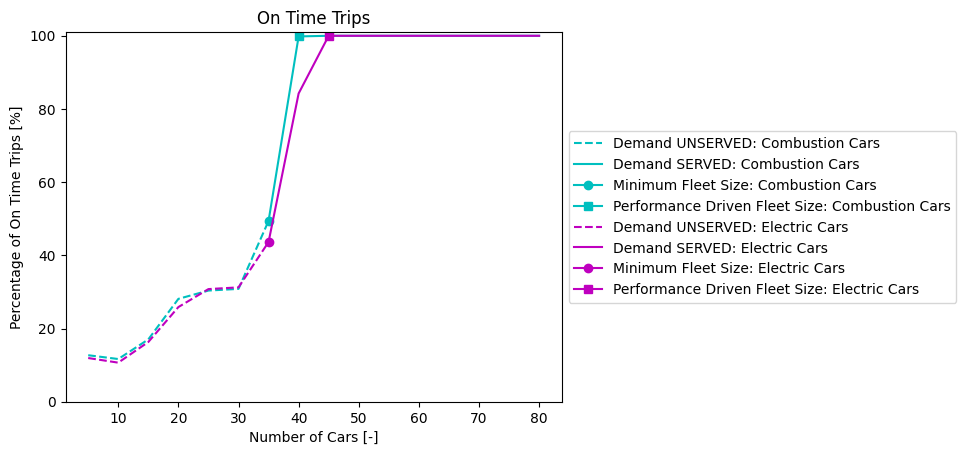

In [32]:
for i in range(len(cc_quality_of_service_df)):
  cc_analysis = cc_quality_of_service_df.at[i,'% Late trips']
  if cc_fleet_serve == cc_quality_of_service_df.at[i,'Num Cars']:
    pos = i
    cc_unserved_df = cc_late_trips_df[:pos+1]
    cc_served_df = cc_late_trips_df[pos:]
    x_value_1_cc = cc_late_trips_df.at[i,'Num Cars']
    y_value_1_cc = 100 - cc_late_trips_df.at[i,'% Late Trips']
  if cc_analysis <= 5:
    cc_fleet_quality = cc_quality_of_service_df.at[i,'Num Cars']
    x_value_2_cc = cc_late_trips_df.at[i,'Num Cars']
    y_value_2_cc = 100 - cc_late_trips_df.at[i,'% Late Trips']
    break

for i in range(len(ec_quality_of_service_df)):
  ec_analysis = ec_quality_of_service_df.at[i,'% Late trips']
  if ec_fleet_serve == ec_quality_of_service_df.at[i,'Num Cars']:
    pos = i
    ec_unserved_df = ec_late_trips_df[:pos+1]
    ec_served_df = ec_late_trips_df[pos:]
    x_value_1_ec = ec_late_trips_df.at[i,'Num Cars']
    y_value_1_ec = 100 - ec_late_trips_df.at[i,'% Late Trips']
  if ec_analysis <= 5:
    ec_fleet_quality = ec_quality_of_service_df.at[i,'Num Cars']
    x_value_2_ec = ec_late_trips_df.at[i,'Num Cars']
    y_value_2_ec = 100 - ec_late_trips_df.at[i,'% Late Trips']
    break

print('Minimum fleet to serve 95% of the trips ON TIME: ', cc_fleet_quality, ' combustion cars')
print('Minimum fleet to serve 95% of the trips ON TIME: ', ec_fleet_quality, ' electric cars')

plt.ylim([0, 101])
plt.title('On Time Trips')
plt.xlabel('Number of Cars [-]') 
plt.ylabel('Percentage of On Time Trips [%]') 
plt.plot(cc_unserved_df['Num Cars'],100-cc_unserved_df['% Late Trips'],'--',color = 'c',label= 'Demand UNSERVED: Combustion Cars')
plt.plot(cc_served_df['Num Cars'],100-cc_served_df['% Late Trips'],'-',color = 'c',label= 'Demand SERVED: Combustion Cars')
plt.plot(x_value_1_cc,y_value_1_cc,color = 'c',marker='o',label="Minimum Fleet Size: Combustion Cars")
plt.plot(x_value_2_cc,y_value_2_cc,color = 'c',marker='s',label="Performance Driven Fleet Size: Combustion Cars")
plt.plot(ec_unserved_df['Num Cars'],100-ec_unserved_df['% Late Trips'],'--',color = 'm',label= 'Demand UNSERVED: Electric Cars')
plt.plot(ec_served_df['Num Cars'],100-ec_served_df['% Late Trips'],'-',color = 'm',label= 'Demand SERVED: Electric Cars')
plt.plot(x_value_1_ec,y_value_1_ec,color = 'm',marker='o',label="Minimum Fleet Size: Electric Cars")
plt.plot(x_value_2_ec,y_value_2_ec,color = 'm',marker='s',label="Performance Driven Fleet Size: Electric Cars")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 

In [30]:
# results_path=Path('/content/drive/MyDrive/PFM/01 Mobility/Food Delivery Study/Data Analysis/Cambridge/TraditionalScenario/2022-09-01 17.45.00/car_quality_service.csv')
# quality_of_service_df.to_csv(results_path,index=False)

### Average Wait Time


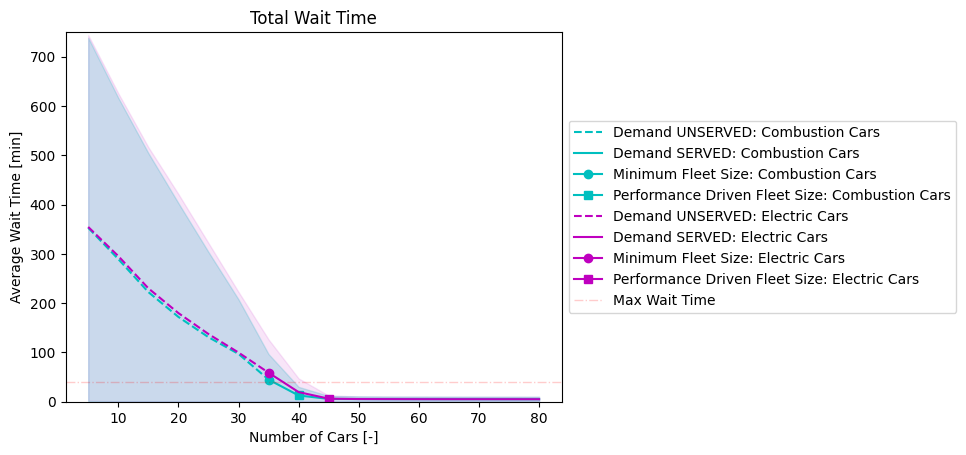

In [31]:
l_cc_quality_service = len(cc_quality_of_service_df)

for i in range(l_cc_quality_service):

    n_cars = n_cars_possible[i]

    cc_temp = cc_quality_of_service_df.loc[(cc_quality_of_service_df['Num Cars']==n_cars)]
    cc_avg_wait = cc_quality_of_service_df[['Num Cars','Average wait time']].reset_index().drop('index',axis=1)
    cc_p0_wait = cc_quality_of_service_df[['Num Cars','0 percentile wait time']].reset_index().drop('index',axis=1)
    cc_p95_wait = cc_quality_of_service_df[['Num Cars','95 percentile wait time']].reset_index().drop('index',axis=1)
    cc_std_dev = cc_quality_of_service_df[['Num Cars','Standard Deviation']].reset_index().drop('index',axis=1)

    ec_temp = ec_quality_of_service_df.loc[(ec_quality_of_service_df['Num Cars']==n_cars)]
    ec_avg_wait = ec_quality_of_service_df[['Num Cars','Average wait time']].reset_index().drop('index',axis=1)
    ec_p0_wait = ec_quality_of_service_df[['Num Cars','0 percentile wait time']].reset_index().drop('index',axis=1)
    ec_p95_wait = ec_quality_of_service_df[['Num Cars','95 percentile wait time']].reset_index().drop('index',axis=1)
    ec_std_dev = ec_quality_of_service_df[['Num Cars','Standard Deviation']].reset_index().drop('index',axis=1)

    if cc_fleet_serve == cc_avg_wait.at[i,'Num Cars']:
      pos = i
      cc_avg_wait_unserved_df = cc_avg_wait[:pos+1]
      cc_avg_wait_served_df = cc_avg_wait[pos:]
      x_value_1_cc = cc_avg_wait.at[i,'Num Cars']
      y_value_1_cc = cc_avg_wait.at[i,'Average wait time']
    if cc_avg_wait.at[i,'Num Cars'] == cc_fleet_quality:
      x_value_2_cc = cc_avg_wait.at[i,'Num Cars']
      y_value_2_cc = cc_avg_wait.at[i,'Average wait time']

    if ec_fleet_serve == ec_avg_wait.at[i,'Num Cars']:
      pos = i
      ec_avg_wait_unserved_df = ec_avg_wait[:pos+1]
      ec_avg_wait_served_df = ec_avg_wait[pos:]
      x_value_1_ec = ec_avg_wait.at[i,'Num Cars']
      y_value_1_ec = ec_avg_wait.at[i,'Average wait time']
    if ec_avg_wait.at[i,'Num Cars'] == ec_fleet_quality:
      x_value_2_ec = ec_avg_wait.at[i,'Num Cars']
      y_value_2_ec = ec_avg_wait.at[i,'Average wait time']

x_cc = np.array(cc_avg_wait['Num Cars'].astype(int))
mean_cc = np.array(cc_avg_wait['Average wait time'].astype(float))
error_cc = np.array(cc_std_dev['Standard Deviation'].astype(float))

x_ec = np.array(ec_avg_wait['Num Cars'].astype(int))
mean_ec = np.array(ec_avg_wait['Average wait time'].astype(float))
error_ec = np.array(ec_std_dev['Standard Deviation'].astype(float))

p0_value_cc = cc_p0_wait['0 percentile wait time']
p95_value_cc = cc_p95_wait['95 percentile wait time']

p0_value_ec = ec_p0_wait['0 percentile wait time']
p95_value_ec = ec_p95_wait['95 percentile wait time']

plt.title('Total Wait Time')
plt.xlabel('Number of Cars [-]') 
plt.ylabel('Average Wait Time [min]') 


plt.plot(cc_avg_wait_unserved_df['Num Cars'],cc_avg_wait_unserved_df['Average wait time'],'--',color = 'c',label= 'Demand UNSERVED: Combustion Cars')
plt.plot(cc_avg_wait_served_df['Num Cars'],cc_avg_wait_served_df['Average wait time'],'-',color = 'c',label= 'Demand SERVED: Combustion Cars')
plt.plot(x_value_1_cc,y_value_1_cc,color = 'c',marker='o',label="Minimum Fleet Size: Combustion Cars")
plt.plot(x_value_2_cc,y_value_2_cc,color = 'c',marker='s',label="Performance Driven Fleet Size: Combustion Cars")
plt.fill_between(x_cc, p0_value_cc, p95_value_cc, color = 'c', alpha=0.2)

plt.plot(ec_avg_wait_unserved_df['Num Cars'],ec_avg_wait_unserved_df['Average wait time'],'--',color = 'm',label= 'Demand UNSERVED: Electric Cars')
plt.plot(ec_avg_wait_served_df['Num Cars'],ec_avg_wait_served_df['Average wait time'],'-',color = 'm',label= 'Demand SERVED: Electric Cars')
plt.plot(x_value_1_ec,y_value_1_ec,color = 'm',marker='o',label="Minimum Fleet Size: Electric Cars")
plt.plot(x_value_2_ec,y_value_2_ec,color = 'm',marker='s',label="Performance Driven Fleet Size: Electric Cars")
plt.fill_between(x_ec, p0_value_ec, p95_value_ec, color = 'm', alpha=0.1)

plt.axhline(y = 40, linestyle='-.', color='r', alpha = 0.2, linewidth = 1, label='Max Wait Time')

plt.ylim([0, 750])  

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 

### Average Pick-Up Wait Time

In [ ]:
cc_quality_of_service_df

,Num Cars,Total packages,Total trips,On time trips,% On time trips,Late trips,% Late trips,Max wait time,Min wait time,Average wait time,Average pick-up wait time,Average delivery wait time,Median wait time,Standard Deviation,0 percentile wait time,95 percentile wait time
0,5,3989,669,85,12.705531,584,87.294469,790.366667,0.833333,352.992476,349.386547,3.605929,345.466667,237.847991,0.83,738.56
1,10,3989,1380,161,11.666667,1219,88.333333,655.233333,0.833333,289.521329,286.147319,3.37401,273.4,199.704344,0.83,616.78
2,15,3989,2055,350,17.03163,1705,82.96837,543.766667,0.833333,222.561882,219.217794,3.344088,202.266667,166.297015,0.83,504.68
3,20,3989,2718,764,28.108904,1954,71.891096,431.5,0.833333,172.101778,168.791611,3.310167,150.133333,138.984739,0.83,403.12
4,25,3989,3302,1003,30.37553,2299,69.62447,335.366667,0.833333,130.99361,127.630739,3.362871,116.533333,105.201949,0.83,303.90
5,30,3989,3817,1177,30.835735,2640,69.164265,219.266667,0.833333,97.004218,93.633822,3.370396,88.0,73.738388,0.83,207.70
6,35,3989,3989,1971,49.41088,2018,50.58912,111.833333,0.666667,44.939985,41.59929,3.340695,40.966667,33.204614,0.67,96.64
7,40,3989,3989,3982,99.824517,7,0.175483,45.533333,0.666667,12.705699,9.365004,3.340695,8.933333,9.492867,0.67,30.12
8,45,3989,3989,3989,100.0,0,0.0,24.066667,0.566667,5.742208,2.401512,3.340695,5.166667,3.102049,0.57,11.70
9,50,3989,3989,3989,100.0,0,0.0,20.233333,0.533333,5.409802,2.069107,3.340695,4.933333,2.825656,0.53,10.95


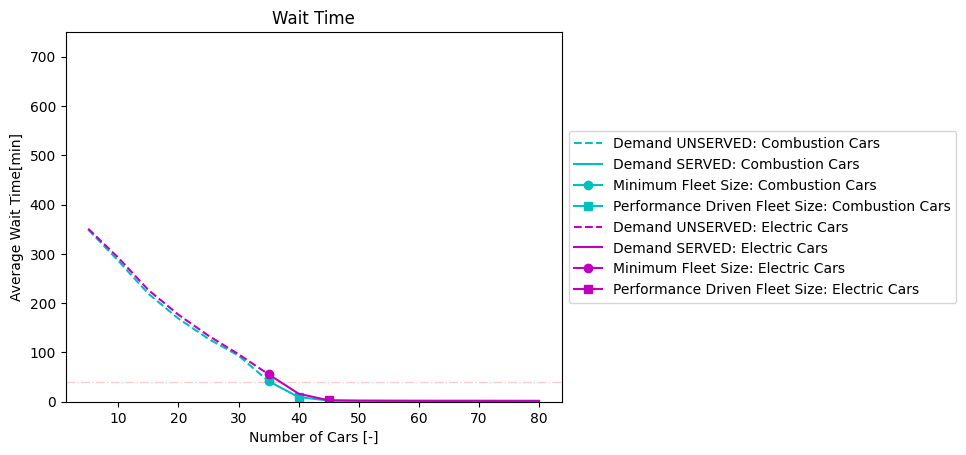

In [ ]:
l_cc_quality_service = len(cc_quality_of_service_df)

for i in range(l_cc_quality_service):

    n_cars = n_cars_possible[i]

    cc_temp = cc_quality_of_service_df.loc[(cc_quality_of_service_df['Num Cars']==n_cars)]
    cc_pu_avg_wait = cc_quality_of_service_df[['Num Cars','Average pick-up wait time']].reset_index().drop('index',axis=1)
    cc_d_avg_wait = cc_quality_of_service_df[['Num Cars','Average delivery wait time']].reset_index().drop('index',axis=1)

    ec_temp = ec_quality_of_service_df.loc[(ec_quality_of_service_df['Num Cars']==n_cars)]
    ec_pu_avg_wait = ec_quality_of_service_df[['Num Cars','Average pick-up wait time']].reset_index().drop('index',axis=1)
    ec_d_avg_wait = ec_quality_of_service_df[['Num Cars','Average delivery wait time']].reset_index().drop('index',axis=1)

    if cc_fleet_serve == cc_pu_avg_wait.at[i,'Num Cars']:
      pos = i
      cc_pu_avg_wait_unserved_df = cc_pu_avg_wait[:pos+1]
      cc_pu_avg_wait_served_df = cc_pu_avg_wait[pos:]
      x_value_1_cc = cc_pu_avg_wait.at[i,'Num Cars']
      y_value_1_cc = cc_pu_avg_wait.at[i,'Average pick-up wait time']

      cc_d_avg_wait_unserved_df = cc_d_avg_wait[:pos+1]
      cc_d_avg_wait_served_df = cc_d_avg_wait[pos:]
      x_value_1_d_cc = cc_d_avg_wait.at[i,'Num Cars']
      y_value_1_d_cc = cc_d_avg_wait.at[i,'Average delivery wait time']
    if cc_avg_wait.at[i,'Num Cars'] == cc_fleet_quality:
      x_value_2_cc = cc_pu_avg_wait.at[i,'Num Cars']
      y_value_2_cc = cc_pu_avg_wait.at[i,'Average pick-up wait time']

      x_value_2_d_cc = cc_d_avg_wait.at[i,'Num Cars']
      y_value_2_d_cc = cc_d_avg_wait.at[i,'Average delivery wait time']

    if ec_fleet_serve == ec_pu_avg_wait.at[i,'Num Cars']:
      pos = i
      ec_pu_avg_wait_unserved_df = ec_pu_avg_wait[:pos+1]
      ec_pu_avg_wait_served_df = ec_pu_avg_wait[pos:]
      x_value_1_ec = ec_pu_avg_wait.at[i,'Num Cars']
      y_value_1_ec = ec_pu_avg_wait.at[i,'Average pick-up wait time']

      ec_d_avg_wait_unserved_df = ec_d_avg_wait[:pos+1]
      ec_d_avg_wait_served_df = ec_d_avg_wait[pos:]
      x_value_1_d_ec = ec_d_avg_wait.at[i,'Num Cars']
      y_value_1_d_ec = ec_d_avg_wait.at[i,'Average delivery wait time']
    if ec_avg_wait.at[i,'Num Cars'] == ec_fleet_quality:
      x_value_2_ec = ec_pu_avg_wait.at[i,'Num Cars']
      y_value_2_ec = ec_pu_avg_wait.at[i,'Average pick-up wait time']

      x_value_2_d_ec = ec_d_avg_wait.at[i,'Num Cars']
      y_value_2_d_ec = ec_d_avg_wait.at[i,'Average delivery wait time']

x_cc = np.array(cc_pu_avg_wait['Num Cars'].astype(int))
mean_cc = np.array(cc_pu_avg_wait['Average pick-up wait time'].astype(float))

x_d_cc = np.array(cc_d_avg_wait['Num Cars'].astype(int))
mean_d_cc = np.array(cc_d_avg_wait['Average delivery wait time'].astype(float))

x_ec = np.array(ec_pu_avg_wait['Num Cars'].astype(int))
mean_ec = np.array(ec_pu_avg_wait['Average pick-up wait time'].astype(float))

x_d_ec = np.array(ec_d_avg_wait['Num Cars'].astype(int))
mean_d_ec = np.array(ec_d_avg_wait['Average delivery wait time'].astype(float))

plt.title('Wait Time')
plt.xlabel('Number of Cars [-]') 
plt.ylabel('Average Wait Time[min]') 


plt.plot(cc_pu_avg_wait_unserved_df['Num Cars'],cc_pu_avg_wait_unserved_df['Average pick-up wait time'],'--',color = 'c',label= 'Demand UNSERVED: Combustion Cars')
plt.plot(cc_pu_avg_wait_served_df['Num Cars'],cc_pu_avg_wait_served_df['Average pick-up wait time'],'-',color = 'c',label= 'Demand SERVED: Combustion Cars')
plt.plot(x_value_1_cc,y_value_1_cc,color = 'c',marker='o',label="Minimum Fleet Size: Combustion Cars")
plt.plot(x_value_2_cc,y_value_2_cc,color = 'c',marker='s',label="Performance Driven Fleet Size: Combustion Cars")

# plt.plot(cc_d_avg_wait_unserved_df['Num Cars'],cc_d_avg_wait_unserved_df['Average delivery wait time'],'--',color = 'orange',label= 'Demand UNSERVED: Combustion Cars')
# plt.plot(cc_d_avg_wait_served_df['Num Cars'],cc_d_avg_wait_served_df['Average delivery wait time'],'-',color = 'orange',label= 'Demand SERVED: Combustion Cars')
# plt.plot(x_value_1_d_cc,y_value_1_d_cc,color = 'orange',marker='o',label="Minimum Fleet Size: Combustion Cars")
# plt.plot(x_value_2_d_cc,y_value_2_d_cc,color = 'orange',marker='s',label="Performance Driven Fleet Size: Combustion Cars")

plt.plot(ec_pu_avg_wait_unserved_df['Num Cars'],ec_pu_avg_wait_unserved_df['Average pick-up wait time'],'--',color = 'm',label= 'Demand UNSERVED: Electric Cars')
plt.plot(ec_pu_avg_wait_served_df['Num Cars'],ec_pu_avg_wait_served_df['Average pick-up wait time'],'-',color = 'm',label= 'Demand SERVED: Electric Cars')
plt.plot(x_value_1_ec,y_value_1_ec,color = 'm',marker='o',label="Minimum Fleet Size: Electric Cars")
plt.plot(x_value_2_ec,y_value_2_ec,color = 'm',marker='s',label="Performance Driven Fleet Size: Electric Cars")

# plt.plot(ec_d_avg_wait_unserved_df['Num Cars'],ec_d_avg_wait_unserved_df['Average delivery wait time'],'--',color = 'm',label= 'Demand UNSERVED: Electric Cars')
# plt.plot(ec_d_avg_wait_served_df['Num Cars'],ec_d_avg_wait_served_df['Average delivery wait time'],'-',color = 'm',label= 'Demand SERVED: Electric Cars')
# plt.plot(x_value_1_d_ec,y_value_1_d_ec,color = 'm',marker='o',label="Minimum Fleet Size: Electric Cars")
# plt.plot(x_value_2_d_ec,y_value_2_d_ec,color = 'm',marker='s',label="Performance Driven Fleet Size: Electric Cars")

plt.axhline(y = 40, linestyle='-.', color='r', alpha = 0.2, linewidth = 1, label='Max Wait Time')
plt.ylim([0, 750])  

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 

### Median Wait Time

In [ ]:
l_quality_service = len(quality_of_service_df)

for i in range(l_quality_service):

    n_cars=n_cars_possible[i]
    temp=quality_of_service_df.loc[(quality_of_service_df['Num Cars']==n_cars)]
    median_wait = quality_of_service_df[['Num Cars','Median wait time']].reset_index().drop('index',axis=1)
    std_dev = quality_of_service_df[['Num Cars','Standard Deviation']].reset_index().drop('index',axis=1)

    if fleet_serve==avg_wait.at[i,'Num Cars']:
      pos = i
      median_wait_unserved_df = median_wait[:pos+1]
      median_wait_served_df = median_wait[pos:]
      x_value_1 = median_wait.at[i,'Num Cars']
      y_value_1 = median_wait.at[i,'Median wait time']
    if median_wait.at[i,'Num Cars']==fleet_quality:
      x_value_2 = median_wait.at[i,'Num Cars']
      y_value_2 = median_wait.at[i,'Median wait time']

x = np.array(avg_wait['Num Cars'].astype(int))
mean = np.array(median_wait['Median wait time'].astype(float))
error = np.array(std_dev['Standard Deviation'].astype(float))

plt.title('Median Wait Time')
plt.xlabel('Number of Cars [-]') 
plt.ylabel('Median Wait Time [min]') 
plt.plot(median_wait_unserved_df['Num Cars'],median_wait_unserved_df['Median wait time'],'--',color = 'c',label= 'Demand UNSERVED')
plt.plot(median_wait_served_df['Num Cars'],median_wait_served_df['Median wait time'],'-',color = 'c',label= 'Demand SERVED')
plt.plot(x_value_1,y_value_1,color = 'c',marker='o',label="Minimum Fleet Size")
plt.plot(x_value_2,y_value_2,color = 'c',marker='s',label="Performance Driven Fleet Size")
plt.fill_between(x, mean - error, mean + error, color = 'c', alpha=0.2)

NameError: ignored

### Number of Trips per Wait Time


In [ ]:
for i in range(6):
    n_cars=n_cars_possible[i+3]
    temp=package_trips_df.loc[(package_trips_df['Num Cars']==n_cars)]
    
    name = 'Number of cars: ' + str(n_cars)
    plt.hist(temp['Total Time (min)'],400,label=name)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 

plt.title('Number of Trips per Wait Time')
plt.xlabel('Wait Time [min]') 
plt.ylabel('Number of Trips [-]') 
plt.show()

In [ ]:
# for i in range(l_n_cars):
#     p_trips=package_trips_df[package_trips_df['Num Cars']==n_cars_possible[i]]
#     l_trips=len(p_trips)
    
#     print('Number of cars: ',n_cars)

#     sns.set_style('whitegrid')

#     # sns.histplot(data=p_trips, x="Departure Time", multiple="stack",bins=60)
#     # plt.show()
#     #demand_grouped=people_trips.groupby(['Time (simulation)']).size().reset_index(name='counts')
#     #print("Demand")
#     #sns.catplot(x="Time (simulation)",y='counts', kind='bar', data=demand_grouped)

#     sns.kdeplot(np.array(p_trips['Total Time (min)']))
#     plt.xlabel('Wait times [min]')
#     plt.show()

#     sns.kdeplot(np.array(p_trips['Distance (m)']))
#     plt.xlabel('Trip distances [m]')
#     plt.show()

#     sns.kdeplot(np.array(p_trips['Total Time (min)']))
#     plt.xlabel('Trip durations [min]')
#     plt.show()

## Car Parameters Nominal Scenario

### Parameter Calculation


In [ ]:
# Filter car trips in the nominal scenario
# fleet_quality = 45
car_nominal_scenario_df = car_trips_df[car_trips_df['Num Cars']==fleet_quality]
package_nominal_scenario_df = package_trips_df[package_trips_df['Num Cars']==fleet_quality]

# Total package demand
total_p_demand = len(demand_df)

# Served package demand
p_demand = len(package_nominal_scenario_df)

# Average total wait time
avg_twaittime = package_nominal_scenario_df['Total Time (min)'].sum()/p_demand

# Average pick-up wait time - Since package is initialized until car arrives
avg_puwaittime = package_nominal_scenario_df['Wait Time (min)'].sum()/p_demand

# Average delivery wait time 
avg_dwaittime = package_nominal_scenario_df['Duration (min)'].sum()/p_demand

# Percentage of trips ON TIME
ontime = 0
for i in range (p_demand):
  if package_nominal_scenario_df.at[i,'Total Time (min)'] <= 40:
    ontime = ontime + 1

# Total km traveled by the car fleet
total_km = car_nominal_scenario_df['Distance Traveled'].sum()/1000

# Total minutes traveled by the car fleet
total_min = fleet_quality*24*60

# Average number of km traveled per car
km_car=total_km/fleet_quality

# Pick-Up Parameters 
car_pickup_df = car_nominal_scenario_df[car_nominal_scenario_df['Event']=='END: picking_up_packages'].reset_index().drop('index',axis=1)
pickup_trips = car_pickup_df.shape[0]
pickup_distance = car_pickup_df['Distance Traveled'].sum()/1000
pickup_time = car_pickup_df['Duration (min)'].sum()
pukm_car = pickup_distance/fleet_quality
pumin_car = pickup_time/fleet_quality
l_pu_car = len(car_pickup_df)

# Delivery Parameters
car_delivery_df = car_nominal_scenario_df[car_nominal_scenario_df['Event']=='END: in_use_packages'].reset_index().drop('index',axis=1)
delivery_trips = car_delivery_df.shape[0]
delivery_distance = car_delivery_df['Distance Traveled'].sum()/1000
delivery_time = car_delivery_df['Duration (min)'].sum()
dkm_car = delivery_distance/fleet_quality
dmin_car = delivery_time/fleet_quality
l_d_car = len(car_delivery_df)

# Go to Refill Parameters
car_goto_refill_list = ['END: night_refilling','END: low_fuel']
car_goto_refill_df = car_nominal_scenario_df[car_nominal_scenario_df['Event'].isin(car_goto_refill_list)].reset_index().drop('index',axis=1)
gotorefill_trips = car_goto_refill_df.shape[0]
gotorefill_distance = car_goto_refill_df['Distance Traveled'].sum()/1000
gotorefill_time = car_goto_refill_df['Duration (min)'].sum()
gtrkm_car = gotorefill_distance/fleet_quality
gtrmin_car = gotorefill_time/fleet_quality
l_gtr_car = len(car_goto_refill_df)

# Refill Parameters
car_refill_list = ['END: getting_night_fuel','END: getting_fuel']
car_refill_df = car_nominal_scenario_df[car_nominal_scenario_df['Event'].isin(car_refill_list)].reset_index().drop('index',axis=1)
refill_time = car_refill_df['Duration (min)'].sum()
rmin_car = refill_time/fleet_quality

# Relocate Parameters
car_relocate_df = car_nominal_scenario_df[car_nominal_scenario_df['Event']=='END: night_relocating'].reset_index().drop('index',axis=1)
relocate_distance = car_relocate_df['Distance Traveled'].sum()/1000
relocate_time = car_relocate_df['Duration (min)'].sum()
rlkm_car = relocate_distance/fleet_quality
rlmin_car = relocate_time/fleet_quality
l_rl_car = len(car_relocate_df)

# Wandering (stopped) Parameters
car_wandering_df = car_nominal_scenario_df[car_nominal_scenario_df['Event']=='END: wandering'].reset_index().drop('index',axis=1)
wandering_time = car_wandering_df['Duration (min)'].sum()
rest_time = total_min - pickup_time - delivery_time - gotorefill_time - refill_time - relocate_time - wandering_time
wandering_time = wandering_time + rest_time
wmin_car = wandering_time/fleet_quality

# Average minutes traveled per car
min_car=(total_min-wandering_time)/fleet_quality

In [ ]:
# Parameter Display DataFrame

# Initialize Parameter DataFrame
car_nominal_scenario_events_df = pd.DataFrame(columns=['Parameters','Values','Unit'])

# Initialize cont variable
cont = 0

# Number of cars
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Number of Cars'
car_nominal_scenario_events_df.at[cont,'Values'] = fleet_quality
car_nominal_scenario_events_df.at[cont,'Unit'] = '-'
cont = cont + 1

# Total Package Demand
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Number of Total Food Delivery Packages'
car_nominal_scenario_events_df.at[cont,'Values'] = total_p_demand
car_nominal_scenario_events_df.at[cont,'Unit'] = '-'
cont = cont + 1

# Served Package Demand
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Number of Served Food Delivery Packages'
car_nominal_scenario_events_df.at[cont,'Values'] = p_demand
car_nominal_scenario_events_df.at[cont,'Unit'] = '-'
cont = cont + 1

# Average Total Wait Time (Package)
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Average Total Wait Time'
car_nominal_scenario_events_df.at[cont,'Values'] = avg_twaittime
car_nominal_scenario_events_df.at[cont,'Unit'] = 'min'
cont = cont + 1

# Average Pick-Up Wait Time (Package)
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Pick-Up'
car_nominal_scenario_events_df.at[cont,'Values'] = (avg_puwaittime/avg_twaittime*100).round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1

# Average Delivery Wait Time (Package)
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Delivery'
car_nominal_scenario_events_df.at[cont,'Values'] = (avg_dwaittime/avg_twaittime*100).round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1

# Percentage of Package Trips On Time
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Package trips < 40 min'
car_nominal_scenario_events_df.at[cont,'Values'] = ontime/p_demand*100
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1

# Percentage of Late Package Trips
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Package trips > 40 min'
car_nominal_scenario_events_df.at[cont,'Values'] = (1-ontime/p_demand)*100
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1

# Average Trips per Car per Day
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Average of Trips per Car per Day'
car_nominal_scenario_events_df.at[cont,'Values'] = p_demand/fleet_quality
car_nominal_scenario_events_df.at[cont,'Unit'] = '-'
cont = cont + 1

# Total Refueling Trips per Day
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Total Refueling Trips per Day'
car_nominal_scenario_events_df.at[cont,'Values'] = l_gtr_car
car_nominal_scenario_events_df.at[cont,'Unit'] = '-'
cont = cont + 1

# Total Distance

# Total km traveled by the car fleet
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Total km'
car_nominal_scenario_events_df.at[cont,'Values'] = total_km.round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = 'km'
cont = cont + 1
# Percentage of total pick-up km
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Pick-Up'
car_nominal_scenario_events_df.at[cont,'Values'] = (pickup_distance/total_km*100).round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Percentage of total delivery km
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Delivery'
car_nominal_scenario_events_df.at[cont,'Values'] = (delivery_distance/total_km*100).round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Percentage of total go to refill km
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Go to Refill'
car_nominal_scenario_events_df.at[cont,'Values'] = (gotorefill_distance/total_km*100).round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Percentage of total relocate km
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Relocate'
car_nominal_scenario_events_df.at[cont,'Values'] = (relocate_distance/total_km*100).round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Total average km traveled by one car
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Average total km traveled per car'
car_nominal_scenario_events_df.at[cont,'Values'] = km_car.round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = 'km/car'
cont = cont + 1

# Total Minutes

# Total minutes traveled by the car fleet
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Total Time'
car_nominal_scenario_events_df.at[cont,'Values'] = (total_min/fleet_quality/60)
car_nominal_scenario_events_df.at[cont,'Unit'] = 'h'
cont = cont + 1
# Percentage of total stopped minutes
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Unused / Stopped'
car_nominal_scenario_events_df.at[cont,'Values'] = (wandering_time/total_min*100).round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Percentage of total in use minutes
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'In Use'
car_nominal_scenario_events_df.at[cont,'Values'] = 100-(wandering_time/total_min*100).round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Percentage of total pick-up minutes
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Pick-Up'
car_nominal_scenario_events_df.at[cont,'Values'] = (pickup_time/total_min*100).round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Percentage of total delivery minutes
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Delivery'
car_nominal_scenario_events_df.at[cont,'Values'] = (delivery_time/total_min*100).round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Percentage of total go to refill minutes
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Go to Refill'
car_nominal_scenario_events_df.at[cont,'Values'] = (gotorefill_time/total_min*100).round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Percentage of total refill minutes
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Refill'
car_nominal_scenario_events_df.at[cont,'Values'] = (refill_time/total_min*100).round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Percentage of total relocate minutes
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Relocate'
car_nominal_scenario_events_df.at[cont,'Values'] = (relocate_time/total_min*100).round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Total average minutes traveled by one car
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Average total hours in use per car'
car_nominal_scenario_events_df.at[cont,'Values'] = (min_car/60).round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = 'h/car'
cont = cont + 1

### Parameter Display

In [ ]:
car_nominal_scenario_events_df.style.apply(lambda x: ['background: bisque' if (x.name == 0 or x.name == 1 or x.name == 2 or x.name == 3 or x.name == 6 or x.name == 7 or x.name == 8 or x.name == 9 or x.name == 10 or x.name == 15 or x.name == 16 or x.name == 24) else '' for i in x], axis=1).format(precision=2)

,Parameters,Values,Unit
0,Number of Cars,40,-
1,Number of Total Food Delivery Packages,3989,-
2,Number of Served Food Delivery Packages,3989,-
3,Average Total Wait Time,12.12,min
4,Pick-Up,72.43,%
5,Delivery,27.57,%
6,Package trips < 40 min,99.92,%
7,Package trips > 40 min,0.08,%
8,Average of Trips per Car per Day,99.72,-
9,Total Refueling Trips per Day,23,-


### Number of Events during Day

#### Calculation


In [ ]:
# Stopped
stopped = car_nominal_scenario_df.loc[(car_nominal_scenario_df['Event'] == 'END: wandering') | (car_nominal_scenario_df['Event'] == 'START: wandering')]
df = stopped
count = 0

stopped_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    event = row["Event"]
    if event == 'END: wandering':
        count = count-1
    elif event == 'START: wandering':
        count = count+1
    else:
        print('Event type error')
    # stopped_count.loc[i] = [i] + [count]
    stopped_count.at[i,'Count'] = count
    stopped_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)

# Low fuel / battery
lowfuel = car_nominal_scenario_df.loc[(car_nominal_scenario_df['Event']== 'END: low_fuel') | (car_nominal_scenario_df['Event']== 'START: low_fuel') | (car_nominal_scenario_df['Event']== 'END: night_refilling') | (car_nominal_scenario_df['Event']== 'START: night_refilling')]
df = lowfuel
count=0

lowfuel_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: low_fuel':
        count = count-1
    elif event == 'START: low_fuel':
        count = count+1
    elif event == 'END: night_refilling':
        count = count-1
    elif event == 'START: night_refilling':
        count = count+1
    else:
        print('Event type error')
    # lowbattery_count.loc[i] = [i] + [count]
    lowfuel_count.at[i,'Count'] = count
    lowfuel_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)

# Charge
refueling = car_nominal_scenario_df.loc[(car_nominal_scenario_df['Event'] == 'END: getting_fuel') | (car_nominal_scenario_df['Event'] == 'START: getting_fuel') | (car_nominal_scenario_df['Event'] == 'END: getting_night_fuel') | (car_nominal_scenario_df['Event'] == 'START: getting_night_fuel')]
df = refueling
count = 0

refueling_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: getting_fuel':
        count = count-1
    elif event == 'START: getting_fuel':
        count = count+1
    elif event == 'END: getting_night_fuel':
        count = count-1
    elif event == 'START: getting_night_fuel':
        count = count+1
    else:
        print('Event type error')
    refueling_count.at[i,'Count'] = count
    refueling_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)

# Night Relocating
relocating = car_nominal_scenario_df.loc[(car_nominal_scenario_df['Event'] == 'END: night_relocating') | (car_nominal_scenario_df['Event'] == 'START: night_relocating')]
df = relocating
count = 0

relocating_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: night_relocating':
        count = count-1
    elif event == 'START: night_relocating':
        count = count+1
    else:
        print('Event type error')
    # relocating_count.loc[i] = [i] + [count]
    relocating_count.at[i,'Count'] = count
    relocating_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)

# Pick-Up
pickup = car_nominal_scenario_df.loc[(car_nominal_scenario_df['Event'] == 'END: picking_up_packages') | (car_nominal_scenario_df['Event'] == 'START: picking_up_packages')]
df = pickup
count = 0

pickup_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: picking_up_packages':
        count = count-1
    elif event == 'START: picking_up_packages':
        count = count+1
    else:
        print('Event type error')
    # pickup_count.loc[i] = [i] + [count]
    pickup_count.at[i,'Count'] =  count
    pickup_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)

# In Use

inuse = car_nominal_scenario_df.loc[(car_nominal_scenario_df['Event']== 'END: in_use_packages') | (car_nominal_scenario_df['Event']== 'START: in_use_packages')] 
df = inuse
count = 0

inuse_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: in_use_packages':
        count = count-1
    elif event == 'START: in_use_packages':
        count = count+1
    else:
        print('Event type error')
    # inuse_count.loc[i] = [i] + [count]
    inuse_count.at[i,'Count'] = count
    inuse_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)

# Pick-Up & In Use 

pickup_inuse = car_nominal_scenario_df.loc[(car_nominal_scenario_df['Event'] == 'END: picking_up_packages') | (car_nominal_scenario_df['Event'] == 'START: picking_up_packages') | (car_nominal_scenario_df['Event']== 'END: in_use_packages') | (car_nominal_scenario_df['Event']== 'START: in_use_packages')] 
df = pickup_inuse
count = 0

pickup_inuse_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: picking_up_packages':
        count = count-1
    elif event == 'START: picking_up_packages':
        count = count+1
    elif event == 'END: in_use_packages':
        count = count-1
    elif event == 'START: in_use_packages':
        count = count+1
    else:
        print('Event type error')
    # pickup_inuse_count.loc[i] = [i] + [count]
    pickup_inuse_count.at[i,'Count'] = count
    pickup_inuse_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)

#### Display

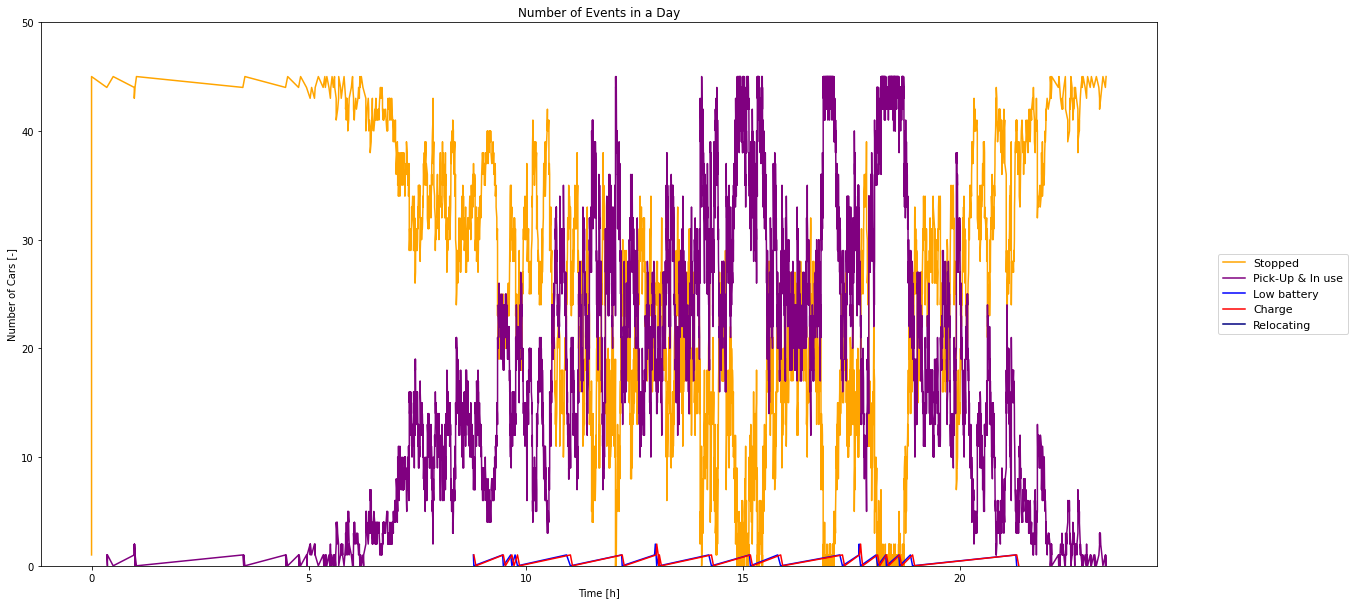

In [ ]:
#Plot
plt.figure(figsize=(20,10))
plt.plot( 'Time', 'Count', data = stopped_count,   color='orange', label="Stopped")
# plt.plot( 'Time', 'Count', data = inuse_count, color='olive', label="In use")
# plt.plot( 'Time', 'Count', data = pickup_count,   color='green', label="Pick-Up")
plt.plot( 'Time', 'Count', data = pickup_inuse_count,   color='purple', label="Pick-Up & In use")
plt.plot( 'Time', 'Count', data = lowfuel_count,   color='blue', label="Low battery")
plt.plot( 'Time', 'Count', data = refueling_count,   color='red', label="Charge")
plt.plot( 'Time', 'Count', data = relocating_count,   color='navy', label="Relocating")
plt.legend( loc='center left', bbox_to_anchor=(1.05, 0.5),fontsize=11)
plt.title('Number of Events in a Day')
plt.xlabel('Time [h]') 
plt.ylabel('Number of Cars [-]') 
plt.ylim(0,50)
plt.show()

# DRAFT

## Package events

In [ ]:
package_events_df=package_events_df.sort_values(by=['Num Cars','Time']).reset_index().drop('index',axis=1)

In [ ]:
for i in range(l_n_cars):
    p_trips=package_events_df[package_events_df['Num Cars']==n_cars_possible[i]]
    lp_trips=len(p_trips)

    li = list(p_trips['Agent'].value_counts())
    print("Nº packages :", len(li))

    # total_km= p_trips['Distance Traveled'].sum()/1000
    # print("Total km: ", total_km)

    # km_package=total_km/len(li)
    # print("Avg km/car: ", km_car)


    events_count = p_trips['Event'].value_counts()
    print(events_count)

    print("\n")

Nº packages : 3076
START: end                     6152
END: end                       3076
START: choosingDeliveryMode    3076
END: choosingDeliveryMode      3076
START: requesting_car          3076
END: requesting_car            3076
START: firstmile               3076
END: firstmile                 3076
START: awaiting_car            3076
END: awaiting_car              3076
START: delivering_car          3076
END: delivering_car            3076
START: lastmile                3076
END: lastmile                  3076
Name: Event, dtype: int64


Nº packages : 3076
START: end                     6152
END: end                       3076
START: choosingDeliveryMode    3076
END: choosingDeliveryMode      3076
START: requesting_car          3076
END: requesting_car            3076
START: firstmile               3076
END: firstmile                 3076
START: awaiting_car            3076
END: awaiting_car              3076
START: delivering_car          3076
END: delivering_car            307